# Visualize BLEU Scores


In [133]:
!ls tabs

BLEU.lowercase.9L6L768d_bsize320k_step124k_beam4_lp0.6_ens10.txt
BleuMacroFChrF.lowercase.6L6L512d_vocab400k40k_bsize40k_step300k.txt
BleuMacroFChrF.lowercase.9L6L768d_bsize720k_step129k.txt
BleuMacroFChrF.lowercase.9L6L768d_bsize720k_step200k.txt
BleuMacroFChrF.mixedcase.9L6L768d_bsize720k_step129k.txt
BleuMacroFChrF.mixedcase.9L6L768d_bsize720k_step200k.txt
dataset-selection.min.tsv
dataset-selection.tsv
train.good.dedup.notest.ascitgt.tok.stats.tsv
zhang-etal-many-to-eng.xlsx


In [131]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
#help(pd.read_csv)

In [132]:
path = 'tabs/BleuMacroFChrF.mixedcase.9L6L768d_bsize720k_step200k.txt'
tab = pd.read_csv(path,sep=r'\s+', names='Test BLEU MacroF1 ChrF'.split())
tab

,Test,BLEU,MacroF1,ChrF
0,neulab_tedtalksv1_test-ben_eng,20.9,25.2,0.42
1,neulab_tedtalksv1_test-bos_eng,39.5,45.8,0.63
2,neulab_tedtalksv1_test-eus_eng,27.1,33.4,0.51
3,JoshuaIndianCorpus_test-urd_eng,16.4,19.8,0.47
4,neulab_tedtalksv1_test-epo_eng,34.4,39.2,0.56
...,...,...,...,...
177,UNv1_test-ara_eng,57.2,51.7,0.78
178,UNv1_test-fra_eng,47.0,47.4,0.70
179,UNv1_test-zho_eng,51.6,49.2,0.74
180,UNv1_test-spa_eng,56.3,53.5,0.77


In [15]:
tab['Test Name'] = tab['Test'].apply(lambda x: x.split('-')[0].replace('_test', ''))
tab['Language'] = tab['Test'].apply(lambda x: x.split('-')[1].split('_')[0].upper())
tab

,Test,BLEU,MacroF1,ChrF,Test Name,Language
0,neulab_tedtalksv1_test-ben_eng,20.9,25.2,0.42,neulab_tedtalksv1,BEN
1,neulab_tedtalksv1_test-bos_eng,39.5,45.8,0.63,neulab_tedtalksv1,BOS
2,neulab_tedtalksv1_test-eus_eng,27.1,33.4,0.51,neulab_tedtalksv1,EUS
3,JoshuaIndianCorpus_test-urd_eng,16.4,19.8,0.47,JoshuaIndianCorpus,URD
4,neulab_tedtalksv1_test-epo_eng,34.4,39.2,0.56,neulab_tedtalksv1,EPO
...,...,...,...,...,...,...
177,UNv1_test-ara_eng,57.2,51.7,0.78,UNv1,ARA
178,UNv1_test-fra_eng,47.0,47.4,0.70,UNv1,FRA
179,UNv1_test-zho_eng,51.6,49.2,0.74,UNv1,ZHO
180,UNv1_test-spa_eng,56.3,53.5,0.77,UNv1,SPA


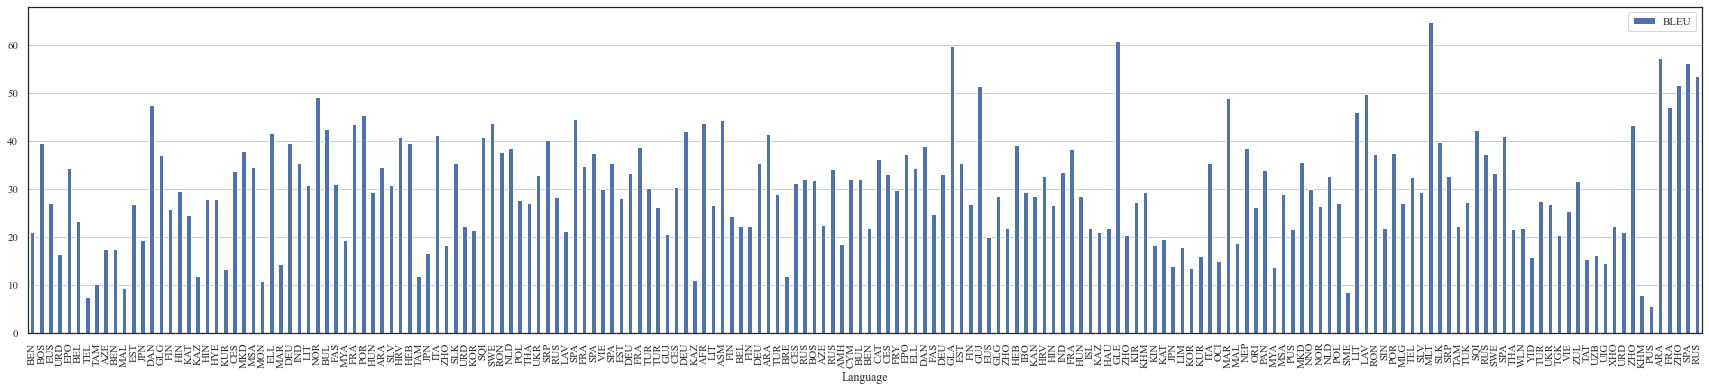

In [16]:
sns.set(font="Times New Roman", style='white',font_scale=.99)

ax = tab[['Language', 'BLEU']].plot.bar(figsize=(30, 6), x='Language', y='BLEU', )
ax.grid(axis='y')

#pd.DataFrame.plot(data=tab, x='Language', y='BLEU')

In [17]:
tab_sorted = tab.sort_values(by='BLEU', ascending=False)
tab_sorted

,Test,BLEU,MacroF1,ChrF,Test Name,Language
152,OPUS100v1_test-mlt_eng,64.7,59.0,0.79,OPUS100v1,MLT
118,OPUS100v1_test-gle_eng,60.7,52.0,0.78,OPUS100v1,GLE
100,OPUS100v1_test-gla_eng,59.8,37.2,0.67,OPUS100v1,GLA
177,UNv1_test-ara_eng,57.2,51.7,0.78,UNv1,ARA
180,UNv1_test-spa_eng,56.3,53.5,0.77,UNv1,SPA
...,...,...,...,...,...,...
10,JoshuaIndianCorpus_test-mal_eng,9.3,13.8,0.36,JoshuaIndianCorpus,MAL
143,OPUS100v1_test-sme_eng,8.6,8.9,0.19,OPUS100v1,SME
175,wikipedia_devtest_kmen-khm_eng,7.8,7.4,0.29,wikipedia_devtest_kmen,KHM
6,JoshuaIndianCorpus_test-tel_eng,7.5,11.8,0.35,JoshuaIndianCorpus,TEL


In [19]:
tab_uniq = tab_sorted.drop_duplicates(['Language'], keep='first')  # one test per language
tab_uniq

,Test,BLEU,MacroF1,ChrF,Test Name,Language
152,OPUS100v1_test-mlt_eng,64.7,59.0,0.79,OPUS100v1,MLT
118,OPUS100v1_test-gle_eng,60.7,52.0,0.78,OPUS100v1,GLE
100,OPUS100v1_test-gla_eng,59.8,37.2,0.67,OPUS100v1,GLA
177,UNv1_test-ara_eng,57.2,51.7,0.78,UNv1,ARA
180,UNv1_test-spa_eng,56.3,53.5,0.77,UNv1,SPA
...,...,...,...,...,...,...
129,OPUS100v1_test-oci_eng,15.0,14.1,0.28,OPUS100v1,OCI
171,OPUS100v1_test-uig_eng,14.5,12.6,0.35,OPUS100v1,UIG
82,OPUS100v1_test-bre_eng,11.8,14.4,0.27,OPUS100v1,BRE
25,neulab_tedtalksv1_test-mon_eng,10.8,16.2,0.32,neulab_tedtalksv1,MON


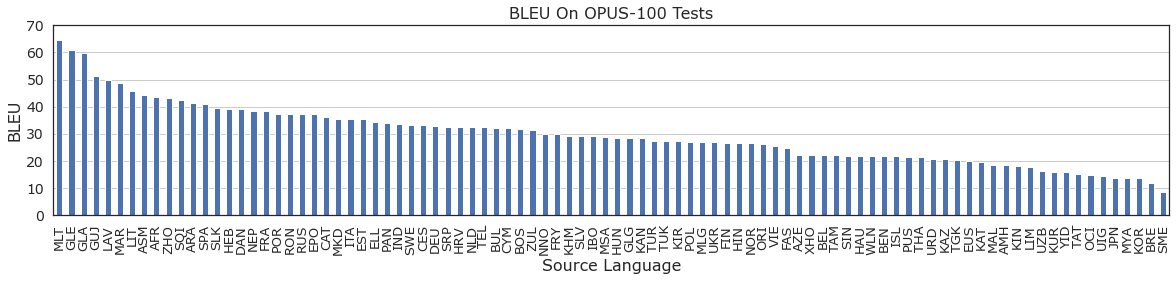

In [21]:
sns.set(font="Verdana", style='white',font_scale=1)
tab_opus = tab[tab['Test Name'] == 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', title=f'BLEU On OPUS-100 Tests', figsize=(20, 3.5), legend=False)
ax = tab_opus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y', markevery=5)
plt.ylim(0, 70)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)

plt.savefig('charts/BLEU-opus100.pdf', bbox_inches='tight')

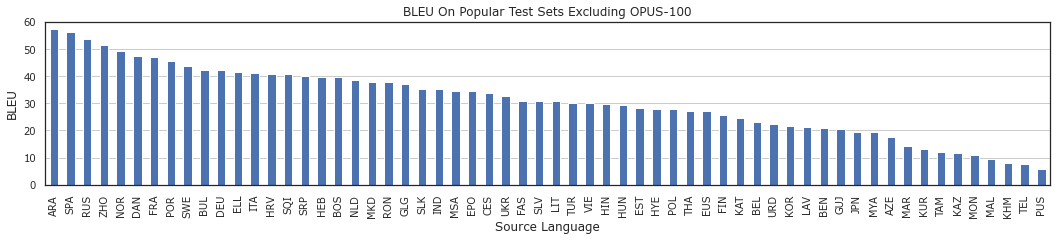

In [22]:
tab_nonopus = tab[tab['Test Name'] != 'OPUS100v1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', figsize=(18, 3), fontsize=10, legend=False)
ax = tab_nonopus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', title=f'BLEU On Popular Test Sets Excluding OPUS-100', **viz_args)
ax.grid(axis='y')
plt.savefig('charts/BLEU-non-opus100.pdf', bbox_inches='tight')

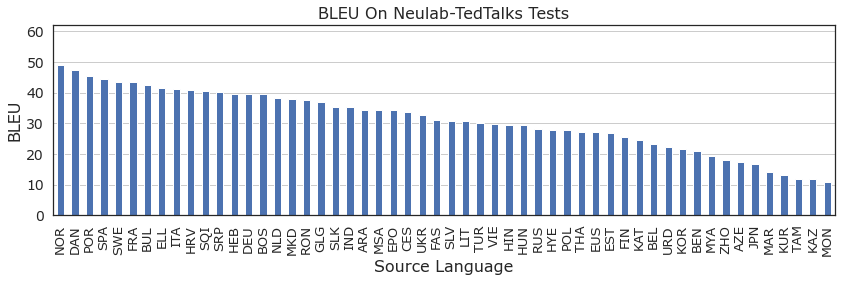

In [24]:
tab_nttalks = tab[tab['Test Name'] == 'neulab_tedtalksv1'].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', figsize=(14, 3.5), fontsize=16, legend=False,
                title=f'BLEU On Neulab-TedTalks Tests')
ax = tab_nttalks[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-nttalksv1.pdf', bbox_inches='tight')

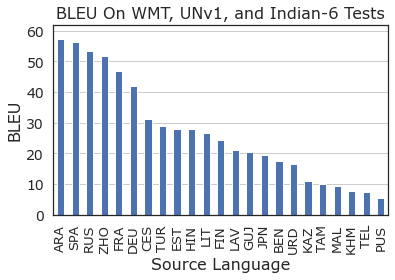

In [25]:
tab_rest= tab[(tab['Test Name'] != 'neulab_tedtalksv1') & (tab['Test Name'] != 'OPUS100v1') ].sort_values(by='BLEU', ascending=False).drop_duplicates(['Language'], keep='first')
viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', figsize=(6, 3.5), legend=False, title=f'BLEU On WMT, UNv1, and Indian-6 Tests')
ax = tab_rest[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
ax.grid(axis='y')
plt.ylim(0, 62)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.savefig('charts/BLEU-wmt-etc.pdf', bbox_inches='tight')

In [15]:
tab_rest

,Test,BLEU,MacroF1,ChrF,Test Name,Language
177,UNv1_test-ara_eng,57.2,51.7,0.78,UNv1,ARA
180,UNv1_test-spa_eng,56.3,53.5,0.77,UNv1,SPA
181,UNv1_test-rus_eng,53.5,50.8,0.75,UNv1,RUS
179,UNv1_test-zho_eng,51.6,49.2,0.74,UNv1,ZHO
178,UNv1_test-fra_eng,47.0,47.4,0.70,UNv1,FRA
71,newstest2018_deen-deu_eng,42.1,47.8,0.65,newstest2018_deen,DEU
83,newstest2019_encs-ces_eng,31.3,40.1,0.58,newstest2019_encs,CES
81,newstest2018_tren-tur_eng,29.0,38.6,0.56,newstest2018_tren,TUR
64,newstest2018_eten-est_eng,28.1,35.0,0.55,newstest2018_eten,EST
19,IITBv1_5_test-hin_eng,27.9,34.5,0.57,IITBv1_5,HIN


In [26]:
zhang_etal = pd.read_excel('tabs/zhang-etal-many-to-eng.xlsx')
zhang_etal

,Language Pairs,ISO639-3,Baseline 6 Layer,Baseline 6 Layer + RoBT,Baseline 6 Layer + MergedAtt,Baseline 6 Layer + MergedAtt + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT + 6-to-6,Baseline 12 Layer + MergedAtt,Baseline 12 Layer + MergedAtt +RoBT,Baseline 12 Layer + MergedAtt + LaLN + LaLT,Baseline 12 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 24 Layer + MergedAtt + LaLN + LaLT,Baseline 24 Layer + MergedAtt + LaLN + LaLT + RoBT
0,Layer Depth,NaN,6.0,6,6,6,6,6,6,12,12,12,12,24,24
1,Merged Attention,NaN,NaN,NaN,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
2,LaLN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,NaN,Y,Y,Y,Y
3,LaLT,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,NaN,Y,Y,Y,Y
4,RoBT,NaN,NaN,Y,NaN,Y,NaN,Y,Y,NaN,Y,NaN,Y,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,wa2en,wln,28.8,29.7,27.9,28.2,29.5,28.2,28.1,30.5,29.8,31,30.1,34,29.6
95,xh2en,xho,18.1,16.7,17.3,16,18,16.9,17.4,20.3,19,21,19.1,23.7,21.6
96,yi2en,yid,22.0,27,23.5,26.4,21.6,22.1,23.2,22.4,21.9,24.6,33,22.7,20.7
97,zh2en,zho,20.0,20.5,19.1,18.9,18.9,19.8,18.3,18.7,21.8,18.5,21.5,18.8,21.6


In [32]:
zhang_etal = zhang_etal.dropna()
zhang_etal['Language'] =  zhang_etal['ISO639-3'].apply(lambda x: x.upper())
zhang_etal

,Language Pairs,ISO639-3,Baseline 6 Layer,Baseline 6 Layer + RoBT,Baseline 6 Layer + MergedAtt,Baseline 6 Layer + MergedAtt + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT + 6-to-6,Baseline 12 Layer + MergedAtt,Baseline 12 Layer + MergedAtt +RoBT,Baseline 12 Layer + MergedAtt + LaLN + LaLT,Baseline 12 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 24 Layer + MergedAtt + LaLN + LaLT,Baseline 24 Layer + MergedAtt + LaLN + LaLT + RoBT,Language
5,af2en,afr,44.1,44,43.3,43.2,44.3,43.8,42.5,46.9,46.8,46.7,47.2,49.3,48.6,AFR
6,am2en,amh,17.4,16.4,16.2,15.9,16.6,16.4,15.9,18.8,19.1,19,19.5,21.1,22.5,AMH
7,ar2en,ara,29.6,28.9,29,28.3,29.7,29,27.4,31.9,31.5,32.2,31.8,34.5,34.2,ARA
8,as2en,asm,45.4,43.3,45.4,42.2,46,44.6,44.7,48.1,46.6,49.5,47.6,52.6,50.6,ASM
9,az2en,aze,21.4,20.4,19.9,19.3,20.9,20.5,20.2,22.9,22.5,23.7,23.4,24.9,24.8,AZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,wa2en,wln,28.8,29.7,27.9,28.2,29.5,28.2,28.1,30.5,29.8,31,30.1,34,29.6,WLN
95,xh2en,xho,18.1,16.7,17.3,16,18,16.9,17.4,20.3,19,21,19.1,23.7,21.6,XHO
96,yi2en,yid,22.0,27,23.5,26.4,21.6,22.1,23.2,22.4,21.9,24.6,33,22.7,20.7,YID
97,zh2en,zho,20.0,20.5,19.1,18.9,18.9,19.8,18.3,18.7,21.8,18.5,21.5,18.8,21.6,ZHO


In [38]:
opus100_merged = tab_opus.merge(zhang_etal, on='Language', how='inner')
opus100_merged

,Test,BLEU,MacroF1,ChrF,Test Name,Language,Language Pairs,ISO639-3,Baseline 6 Layer,Baseline 6 Layer + RoBT,...,Baseline 6 Layer + MergedAtt + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 6 Layer + MergedAtt + LaLN + LaLT + RoBT + 6-to-6,Baseline 12 Layer + MergedAtt,Baseline 12 Layer + MergedAtt +RoBT,Baseline 12 Layer + MergedAtt + LaLN + LaLT,Baseline 12 Layer + MergedAtt + LaLN + LaLT + RoBT,Baseline 24 Layer + MergedAtt + LaLN + LaLT,Baseline 24 Layer + MergedAtt + LaLN + LaLT + RoBT
0,OPUS100v1_test-mlt_eng,64.7,59.0,0.79,OPUS100v1,MLT,mt2en,mlt,54.8,54.6,...,53.8,55.2,54.7,54.2,56.8,56.3,57,56.8,59.2,58.8
1,OPUS100v1_test-gle_eng,60.7,52.0,0.78,OPUS100v1,GLE,ga2en,gle,48.9,47.4,...,45.5,48.8,47.2,47.3,51.5,50.7,52.2,50.8,55.3,54.3
2,OPUS100v1_test-gla_eng,59.8,37.2,0.67,OPUS100v1,GLA,gd2en,gla,54.2,61.2,...,59.9,48.7,55.9,43.6,56.5,61,43.4,51,62.5,59.9
3,OPUS100v1_test-guj_eng,51.4,45.0,0.69,OPUS100v1,GUJ,gu2en,guj,54.8,53.5,...,52.8,54.8,52.9,53.7,56.5,55.8,56.4,55.7,58.5,58.3
4,OPUS100v1_test-lav_eng,49.7,50.4,0.69,OPUS100v1,LAV,lv2en,lav,39.5,39,...,38.4,39.5,38.9,38.6,41.9,41.1,41.9,41.4,44.3,43.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,OPUS100v1_test-jpn_eng,13.9,21.9,0.32,OPUS100v1,JPN,ja2en,jpn,10.3,9.5,...,9.1,9.5,9.5,9.5,10.5,10.5,10.4,10.5,11.2,11.4
88,OPUS100v1_test-mya_eng,13.7,15.5,0.34,OPUS100v1,MYA,my2en,mya,11.8,9.6,...,10.8,13.6,11.5,12.2,12.7,11.9,13.2,12.8,14,13.8
89,OPUS100v1_test-kor_eng,13.6,18.6,0.31,OPUS100v1,KOR,ko2en,kor,11.1,10.8,...,10.4,11.4,11.3,11.1,11.3,11.2,12.1,12.2,12.6,12.7
90,OPUS100v1_test-bre_eng,11.8,14.4,0.27,OPUS100v1,BRE,br2en,bre,14.7,13.6,...,13.1,15.3,16.9,14.1,16.7,15.4,17.7,19.2,20,20.1


In [128]:
mapping = {'BLEU': 'Our Model',
             'Baseline 6 Layer': 'Zang et al.(2020); 6 Layer',
             'Baseline 12 Layer + MergedAtt + LaLN + LaLT + RoBT': 'Zang et al.(2020); 12 Layer MergedAtt + LaLN + LaLT + RoBT',
             'Baseline 24 Layer + MergedAtt + LaLN + LaLT + RoBT': 'Zang et al.(2020); 24 Layer MergedAtt + LaLN + LaLT + RoBT'}

opus_select = opus100_merged[['Language'] + list(mapping.keys())
                            ].rename(columns= mapping)
opus_select

,Language,Our Model,Zang et al.(2020); 6 Layer,Zang et al.(2020); 12 Layer MergedAtt + LaLN + LaLT + RoBT,Zang et al.(2020); 24 Layer MergedAtt + LaLN + LaLT + RoBT
0,MLT,64.7,54.8,56.8,58.8
1,GLE,60.7,48.9,50.8,54.3
2,GLA,59.8,54.2,51,59.9
3,GUJ,51.4,54.8,55.7,58.3
4,LAV,49.7,39.5,41.4,43.8
...,...,...,...,...,...
87,JPN,13.9,10.3,10.5,11.4
88,MYA,13.7,11.8,12.8,13.8
89,KOR,13.6,11.1,12.2,12.7
90,BRE,11.8,14.7,19.2,20.1


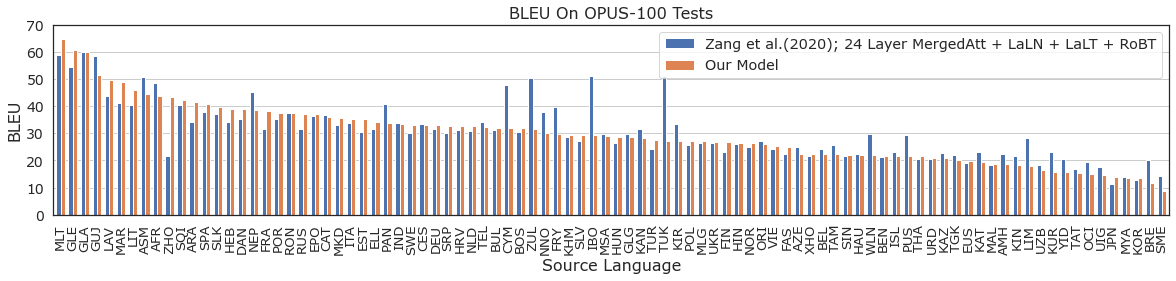

In [130]:
# Zang etal.(2020) 6L6L512d',
sns.set(font="Verdana", style='white',font_scale=1.05)
baseline = 'Zang et al.(2020); 6 Layer'
comparison = 'Zang et al.(2020); 12 Layer'
comparison = 'Zang et al.(2020); 24 Layer MergedAtt + LaLN + LaLT + RoBT'
cols=[comparison, "Our Model"]
sns.set(font="Verdana", style='white', font_scale=1)

viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', title=f'BLEU On OPUS-100 Tests', figsize=(20, 3.5), legend=True)
#ax = tab_opus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
# .sort_values(by=comparison, ascending=False)
ax = opus_select.plot(x="Language", y=cols, kind="bar", width=0.7, **viz_args)
ax.grid(axis='y', markevery=5)
plt.ylim(0, 70)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13.25)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.legend(fontsize="large")
plt.savefig('charts/BLEU-opus100.pdf', bbox_inches='tight')

In [109]:
for col in mapping.values():
    print(f"=== {col} ===")
    print('Our < Comparison:', len(opus_select[opus_select['Our Model'] < opus_select[col]]))
    print('%.2f' % opus_select['Our Model'].mean(), '%.2f' % opus_select[col].mean())

=== Our Model ===
Our < Comparison: 0
29.72 29.72
=== Zang etal.(2020) 6 Layer ===
Our < Comparison: 23
29.72 27.30
=== Zang etal.(2020) 12 Layer ===
Our < Comparison: 31
29.72 29.25
=== Zang etal.(2020) 24 Layer ===
Our < Comparison: 44
29.72 30.66


# In noticed a pattern! Our model is poor on short sentences

So I am going to sort them based on lengths

In [139]:
test_lens = pd.read_csv('tabs/tests.src.len.stats', sep=' ')
test_lens

,Test,Tokens,Sentences,Mean
0,IITBv1_5_test-hin_eng.hin.tok,62790,2507,25.0459
1,JoshuaIndianCorpus_test-ben_eng.ben.tok,13212,1001,13.1988
2,JoshuaIndianCorpus_test-mal_eng.mal.tok,11813,1267,9.3236
3,JoshuaIndianCorpus_test-tam_eng.tam.tok,11203,1225,9.1453
4,JoshuaIndianCorpus_test-tel_eng.tel.tok,9424,1047,9.0010
...,...,...,...,...
177,UNv1_test-rus_eng.rus.tok,115795,4000,28.9488
178,UNv1_test-spa_eng.spa.tok,139516,4000,34.8790
179,UNv1_test-zho_eng.zho.tok,178365,4000,44.5913
180,wikipedia_devtest_kmen-khm_eng.khm.tok,64862,2309,28.0909


In [147]:
test_lens = test_lens[test_lens['Test'].apply(lambda x: 'OPUS' in x)]
test_lens['Language'] =  test_lens['Test'].apply(lambda x: x.split('.')[1].upper())
test_lens 

,Test,Tokens,Sentences,Mean,Language
83,OPUS100v1_test-afr_eng.afr.tok,12797,2000,6.3985,AFR
84,OPUS100v1_test-amh_eng.amh.tok,34910,2000,17.4550,AMH
85,OPUS100v1_test-ara_eng.ara.tok,21387,2000,10.6935,ARA
86,OPUS100v1_test-asm_eng.asm.tok,14822,2000,7.4110,ASM
87,OPUS100v1_test-aze_eng.aze.tok,32959,2000,16.4795,AZE
...,...,...,...,...,...
170,OPUS100v1_test-wln_eng.wln.tok,8425,2000,4.2125,WLN
171,OPUS100v1_test-xho_eng.xho.tok,21418,2000,10.7090,XHO
172,OPUS100v1_test-yid_eng.yid.tok,6218,2000,3.1090,YID
173,OPUS100v1_test-zho_eng.zho.tok,73693,2000,36.8465,ZHO


In [160]:
opus_with_lens = opus_select.merge(test_lens, on='Language').sort_values(by='Our Model', ascending=False)
opus_with_lens['Lang+Len'] = opus_with_lens['Language'] + opus_with_lens['Mean'].apply(lambda x: f' ({x:.1f})')
opus_with_lens

,Language,Our Model,Zang et al.(2020); 6 Layer,Zang et al.(2020); 12 Layer MergedAtt + LaLN + LaLT + RoBT,Zang et al.(2020); 24 Layer MergedAtt + LaLN + LaLT + RoBT,Test,Tokens,Sentences,Mean,Lang+Len
0,MLT,64.7,54.8,56.8,58.8,OPUS100v1_test-mlt_eng.mlt.tok,60258,2000,30.1290,MLT (30.1)
1,GLE,60.7,48.9,50.8,54.3,OPUS100v1_test-gle_eng.gle.tok,44107,2000,22.0535,GLE (22.1)
2,GLA,59.8,54.2,51,59.9,OPUS100v1_test-gla_eng.gla.tok,22610,1606,14.0785,GLA (14.1)
3,GUJ,51.4,54.8,55.7,58.3,OPUS100v1_test-guj_eng.guj.tok,11944,2000,5.9720,GUJ (6.0)
4,LAV,49.7,39.5,41.4,43.8,OPUS100v1_test-lav_eng.lav.tok,40386,2000,20.1930,LAV (20.2)
...,...,...,...,...,...,...,...,...,...,...
87,JPN,13.9,10.3,10.5,11.4,OPUS100v1_test-jpn_eng.jpn.tok,15730,2000,7.8650,JPN (7.9)
88,MYA,13.7,11.8,12.8,13.8,OPUS100v1_test-mya_eng.mya.tok,27929,2000,13.9645,MYA (14.0)
89,KOR,13.6,11.1,12.2,12.7,OPUS100v1_test-kor_eng.kor.tok,29039,2000,14.5195,KOR (14.5)
90,BRE,11.8,14.7,19.2,20.1,OPUS100v1_test-bre_eng.bre.tok,13395,2000,6.6975,BRE (6.7)


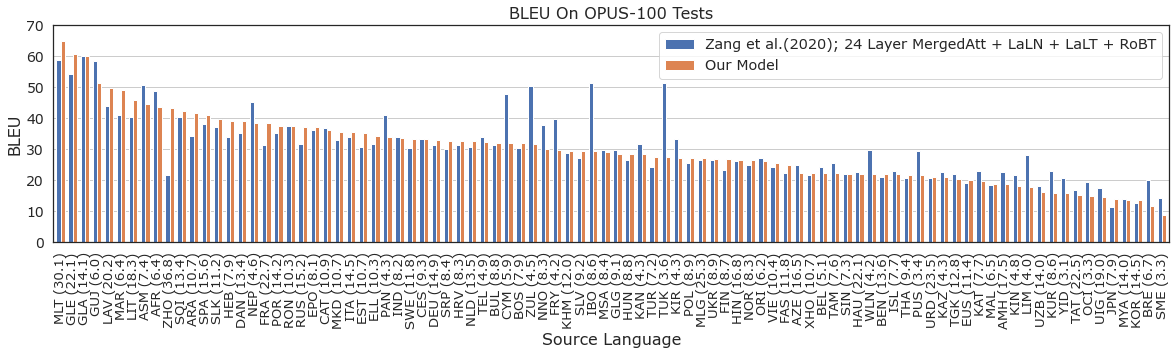

In [164]:
# Zang etal.(2020) 6L6L512d',
sns.set(font="Verdana", style='white',font_scale=1.05)
baseline = 'Zang et al.(2020); 6 Layer'
#comparison = 'Zang et al.(2020); 12 Layer'
comparison = 'Zang et al.(2020); 24 Layer MergedAtt + LaLN + LaLT + RoBT'
cols=[comparison, "Our Model"]
sns.set(font="Verdana", style='white', font_scale=1)

viz_args = dict(xlabel=f'Source Language', ylabel='BLEU', title=f'BLEU On OPUS-100 Tests', figsize=(20, 4), legend=True)
#ax = tab_opus[['Language', 'BLEU']].plot.bar(x='Language', y='BLEU', **viz_args)
# .sort_values(by=comparison, ascending=False)
ax = opus_with_lens.plot(x="Lang+Len", y=cols, kind="bar", width=0.7, **viz_args)
ax.grid(axis='y', markevery=5)
plt.ylim(0, 70)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13.25)
plt.xlabel(viz_args['xlabel'], fontsize=16)
plt.ylabel(viz_args['ylabel'], fontsize=16)
plt.title(viz_args['title'], fontsize=16)
plt.legend(fontsize="large")
#plt.savefig('charts/BLEU-opus100.pdf', bbox_inches='tight')